# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('C:\AnacondaSrc\Course2\week1\dvertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# Ваш код здесь
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Ваш код здесь
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
import numpy as np
X = adver_data[['TV','Radio','Newspaper']].values
y = adver_data['Sales'].values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
means, stds = np.mean(X,axis=0), np.std(X,axis=0)

In [7]:
X = (X - means)/stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
import numpy as np
X = np.hstack((X,np.ones((X.shape[0],1))))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [9]:
def mserror(y, y_pred):
    # Ваш код здесь
    return (1./ y.size)*np.sum((y_pred - y)**2)

temp= np.median(y)

ymedian = [temp for i in y]
print ymedian
print mserror(y, ymedian)

[12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [10]:
answer1 = mserror(y, ymedian)
print(answer1)
write_answer_to_file(answer1, "1.txt")

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [11]:
def normal_equation(X, y):
    return np.dot( np.linalg.pinv(X), y)

t= np.linalg.pinv(X)
t= normal_equation(X, y)
y.shape
t.shape
print t

[  3.91925365   2.79206274  -0.02253861  14.0225    ]


In [12]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[  3.91925365   2.79206274  -0.02253861  14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [13]:
answer2 = np.dot([0., 0., 0., 1.], norm_eq_weights)
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [14]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [15]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [28]:
print np.dot(np.ones([5]), np.ones([5]))
print np.ones([5]) * np.ones([5])

5.0
[ 1.  1.  1.  1.  1.]


In [40]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    dif = w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3]-y[train_ind]
    grad0 = dif*2./4.*X[train_ind,0]
    grad1 = dif*2./4.*X[train_ind,1]
    grad2 = dif*2./4.*X[train_ind,2]
    grad3 = dif*2./4.*X[train_ind,3]
    print dif
    print len(y)
    print np.array([grad0, grad1, grad2, grad3])    
    return w - eta * np.array([grad0, grad1, grad2, grad3])
def stochastic_gradient_step1(X, y, w, train_ind, eta=0.01):
    # признаки объекта, на котором будем улучшать значение функционала ошибки
    x = X[train_ind,:]

    #отклонение на объекте
    delta = np.dot(x,w) - y[train_ind]
    print delta
    # число объектов в тренировочной выборке
    l = float(len(y))
    
    # вычислим вектор градиента по формуле (2/l) * (x.T) * <вектор отклонения> 
    grad = x*delta*2/l
    print grad
    # возвращаем новые веса
    return  w-eta*grad

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [41]:
from scipy.spatial.distance import euclidean
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
     # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        if verbose:
            print w
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w1 = stochastic_gradient_step(X, y, w, random_ind, eta)    
        errors = np.append(errors,[0])
        errors[iter_num] =  mserror(y, linear_prediction(X,w))
        iter_num = iter_num+1
        weight_dist =  euclidean(w1,w) 
        w = w1 
        
    print iter_num
    print weight_dist
    return w, errors

stochastic_gradient_descent(X, y, np.zeros(4), eta=1e-2, max_iter=10,min_weight_dist=1e-8, seed=42, verbose=True)

[ 0.  0.  0.  0.]
-14.8
200
[-11.5059924    6.57771309   3.11817664  -7.4       ]
[ 0.11505992 -0.06577713 -0.03118177  0.074     ]
-12.4235615418
200
[-1.34605349  5.56347276  3.70406073 -6.21178077]
[ 0.12852046 -0.12141186 -0.06822237  0.13611781]
-19.3310934152
200
[ -7.97464614  -6.68054716 -12.65626953  -9.66554671]
[ 0.20826692 -0.05460639  0.05834032  0.23277327]
-18.622517801
200
[-6.20365834 -6.05843603 -6.62037391 -9.3112589 ]
[ 0.2703035   0.00597797  0.12454406  0.32588586]
-7.26916338002
200
[ 5.17955275  3.0098296   0.14287965 -3.63458169]
[ 0.21850798 -0.02412032  0.12311526  0.36223168]
-12.1116980089
200
[ 2.6335441   3.66549152 -0.31946092 -6.055849  ]
[ 0.19217254 -0.06077524  0.12630987  0.42279017]
-15.2831015098
200
[-12.39910176   4.83168085   9.44601372  -7.64155075]
[ 0.31616355 -0.10909205  0.03184974  0.49920568]
-17.2365387668
200
[-7.18102471 -2.58146913 -9.06334106 -8.61826938]
[ 0.3879738  -0.08327736  0.12248315  0.58538837]
-13.5889529719
200
[-10.5644

(array([ 0.44131993, -0.14736039,  0.12575825,  0.68825781]),
 array([ 223.71625   ,  221.19694552,  219.8003337 ,  215.78311148,
         212.24348673,  211.8255391 ,  210.59015565,  208.07742495,
         204.85832509,  202.7010415 ]))

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [38]:
stochastic_gradient_descent(X, y, np.zeros(4), eta=1e-2, max_iter=10,min_weight_dist=1e-8, seed=42, verbose=True)

[ 0.  0.  0.  0.]
-14.8
[-0.23011985  0.13155426  0.06236353 -0.148     ]
[ 0.0023012  -0.00131554 -0.00062364  0.00148   ]
-12.5964712308
[-0.02729575  0.11281809  0.07511227 -0.12596471]
[ 0.00257416 -0.00244372 -0.00137476  0.00273965]
-19.3986256905
[-0.1600501  -0.13407771 -0.25400967 -0.19398626]
[ 0.00417466 -0.00110295  0.00116534  0.00467951]
-18.9924281861
[-0.12653771 -0.12357557 -0.13503757 -0.18992428]
[ 0.00544003  0.00013281  0.00251571  0.00657875]
-7.20138258218
[ 0.10262513  0.05963529  0.00283095 -0.07201383]
[ 0.00441378 -0.00046354  0.0024874   0.00729889]
-12.394208767
[ 0.05389945  0.07501981 -0.00653825 -0.12394209]
[ 0.00387479 -0.00121374  0.00255279  0.00853831]
-15.8875626574
[-0.25778996  0.10045557  0.19639225 -0.15887563]
[ 0.00645269 -0.0022183   0.00058886  0.01012707]
-17.984541522
[-0.1498531  -0.05386991 -0.18913314 -0.17984542]
[ 0.00795122 -0.0016796   0.0024802   0.01192552]
-14.7752635468
[-0.22973523  0.13133438  0.0622593  -0.14775264]
[ 0.0102

(array([ 0.00920035, -0.00306687,  0.00249708,  0.01410304]),
 array([ 223.71625   ,  223.665389  ,  223.63640485,  223.5549101 ,
         223.48076245,  223.47256427,  223.44655232,  223.39175145,
         223.32145218,  223.27074621]))

In [35]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(4), 
                                                                            eta=1e-2, max_iter=1e5,
                                                                            min_weight_dist=1e-8, seed=42, 
                                                                            verbose=False)

100000
0.0333105190373
Wall time: 32.8 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


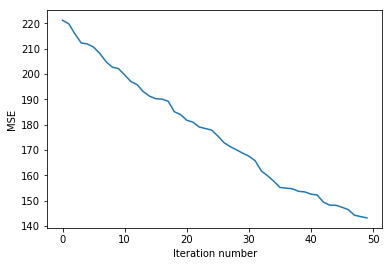

In [147]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


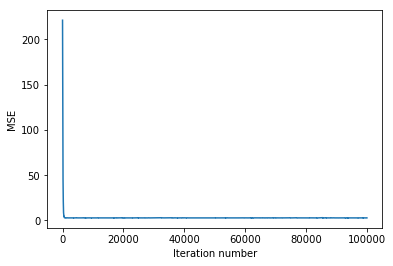

In [158]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [182]:
stoch_grad_desc_weights

array([  3.93301245,   2.92291325,   0.05091929,  14.00550601])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [183]:
stoch_errors_by_iter[-1]

2.8084609825540308

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [181]:
answer4 = mserror(y, linear_prediction(X,stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.81424147958


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**